In [1]:
## Package imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import nltk; nltk.download('punkt'); nltk.download('stopwords')
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## sklearn imports
from sklearn.feature_extraction.text import CountVectorizer

## lda
from gensim import corpora
import gensim

## visualizing LDA--likely need to install
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()

## print mult things
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## random
import random
import string; punctstr = string.punctuation # english punctuation marks

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/orenpoleshuckkinel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orenpoleshuckkinel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
## Import data
df_sirs = pd.read_excel('Dartmouth Data Set- SIRS .xlsx')
df_feis = pd.read_excel('Dartmouth FEIS Data.xlsx')
df_time = pd.read_excel('Dartmouth Time Data.xlsx')

# Attempt to merge dataframes but failed

In [3]:
## Look at head of each data
print(len(df_sirs))
print(len(df_feis))
print(len(df_time))

4986
1940
304489


In [4]:
df_time.columns

Index(['Client Local Id', 'Date', 'Minutes', 'Section', 'Type'], dtype='object')

In [5]:
df_time['Client Local Id'].value_counts()

Client Local Id
44891       2305
50546       1467
50483       1261
375928       986
51677        976
            ... 
1113802        1
11136034       1
327637         1
191621E        1
437338         1
Name: count, Length: 5152, dtype: int64

In [6]:
df_time[df_time['Client Local Id'] == 44891]

,Client Local Id,Date,Minutes,Section,Type
1075,44891,2020-12-29 00:00:00,5,Clinical Case Consultation,Clinical case review/information sharing
1079,44891,2020-12-29 00:00:00,5,Clinical Case Consultation,Clinical case review/information sharing
1085,44891,2020-12-29 00:00:00,5,Clinical Case Consultation,Clinical case review/information sharing
1103,44891,2020-12-29 00:00:00,5,Clinical Case Consultation,Clinical case review/information sharing
1108,44891,2020-12-29 00:00:00,5,Clinical Case Consultation,Clinical case review/information sharing
...,...,...,...,...,...
304096,44891,2019-01-02 00:00:00,60,"Outreach, Specialized Training and System Link...",Outreach/planned contact with case manager
304097,44891,2019-01-02 00:00:00,50,"Outreach, Specialized Training and System Link...",Outreach/Planned contact with family
304107,44891,2019-01-02 00:00:00,10,Clinical Case Consultation,Clinical case review/information sharing
304372,44891,2019-01-02 00:00:00,10,Clinical Case Consultation,Clinical case review/information sharing


In [7]:
## Create MEGA df
# sirs_feis = df_sirs.merge(df_feis, left_on = "Local ID", right_on = "Respondent ID # (SIRS Local ID)", how = 

# Cleaning data and merging into new categories

In [8]:
## Cleaning Race Data
demo = df_sirs[['DOB', 'Gender', 'Race', 'Ethnicity', 'Level of Intellectual Disability',
       'Current living situation at enrollment to START']]


##
def categorize_race(race):
    categories = {
        'Asian': ['Asian', 'Asian, Other: Chinese', 'Asian, Other: Filipino', 'Asian, Other: Indian', 'Asian, Other: Vietnamese', 'Asian, Black or African American', 'Asian, Native Hawaiian or Other Pacific Islander, Other: Hispanic', 'Asian, Other: Hispanic'],
        'White': ['White', 'Unknown, not collected, White', 'Other: White', 'Other: White and Black or African America', 'Other: White and Asian', 'Other: MIXED RACE, White', 'Other: Panamanian and white, White', 'Other: Caucasian', 'Other: White/Indian', 'Other: White, Hispanic'],
        'Other: Hispanic': ['Other: Hispanic', 'Other: HISPANIC', 'Other: Hispanic ', 'Other: hispanic', 'Other: Hispanic, White', 'Other: hispanic, White', 'Other: Hispanic/Latino', 'Other: Hispanic - Puerto Rican descent', 'Other: Latino', 'Other: Latino, White', 'Other: Hispanic/ Latina', 'Other: Latino (Guatemalen & El Salvador)', 'Other: Latino ( Mexican & Puerto Rican )', 'Other: Hispanic: Puerto Rican', 'Other: Mexican/Puerto Rican', 'Other: Hispanic decent', 'Other: Hispanic, AA and white', 'Other: Hispanic (Uruguayan/Dominican)', 'Other: Hispanic, Unknown, not collected', 'Other: hispanic', 'Other: Hispanic - Puerto Rican descent', 'Other: Latino ( Mexican & Puerto Rican )'],
        'American Indian or Alaska Native': ['American Indian or Alaska Native', 'American Indian or Alaska Native, Black or African American', 'American Indian or Alaska Native, Black or African American, White']
    }
    
demo['race_clean'] = demo['Race'].apply(categorize_race)
demo['race_clean'].unique()

/var/folders/ss/3094bd1s7k55hnfygclmswz00000gn/T/ipykernel_38208/2463218851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['race_clean'] = demo['Race'].apply(categorize_race)


array([None], dtype=object)

In [9]:
## Cleaning Gender Data
demo['Gender'].unique()
gender_categories = {
    'Male': ['Male', 'Other: Desires to transition from male to female', 'Other: FTM', 'Other: transgender male'],
    'Female': ['Female', 'Other: transgender female', 'Other: Male to Female', 'Other: Born male/ he/ him, Currently identifies as female/ she/ her', 'Other: Identifies as female ', 'Other: Transgender female']
}

def categorize_gender(gender):
    for category, gender_list in gender_categories.items():
        if gender in gender_list:
            return category
    return 'Other'

demo.loc[:, 'gender_clean'] = demo['Gender'].apply(categorize_gender)

array(['Male', 'Female',
       'Other: Born male, unsure of gender identity at this time',
       'Other: Desires to transition from male to female',
       'Other: currently exploring male and female gender identities',
       'Other: ', 'Other: FTM', 'Other: transgender male',
       'Other: not sure yet as to who Sam identifies with',
       'Other: transgender female', 'Other: Male to Female',
       'Other: non binary',
       'Other: Born male/ he/ him, Currently identifies as female/ she/ her',
       'Other: Non-Binary', 'Other: Identifies as female ',
       'Other: Transgender female',
       'Other: biologically female. self describes as male'], dtype=object)

/var/folders/ss/3094bd1s7k55hnfygclmswz00000gn/T/ipykernel_38208/23882166.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo.loc[:, 'gender_clean'] = demo['Gender'].apply(categorize_gender)


<BarContainer object of 3 artists>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Gender Composition')

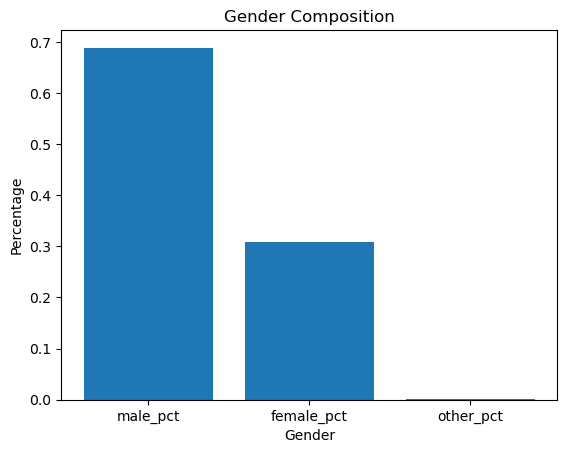

In [10]:
## Finding Gender Composition
total_entries = len(demo)
male = demo['gender_clean'].value_counts().loc['Male']/total_entries
female = demo['gender_clean'].value_counts().loc['Female']/total_entries
other = demo['gender_clean'].value_counts().loc['Other']/total_entries

gender_pct = pd.DataFrame({
    'gender': ['male_pct', 'female_pct', 'other_pct'], 
    'percentage': [male, female, other]
})

plt.bar(gender_pct['gender'], gender_pct['percentage'])
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Composition')

# Save the figure
plt.savefig('output/gender_composition.png')

In [11]:
## Cleaning Living Situation Data
demo['Current living situation at enrollment to START'].unique()

array(['Group home', 'Family home', 'Foster care home',
       'Independent living ', 'Psychiatric hospital', 'Supported living',
       'Alternative Family Living (AFL)', 'Community ICF/DD',
       'Supervised apartment',
       'Other: Psychiatric Residential Treatment Facility',
       'State operated I/DD center', 'Other: Crisis ',
       'Assisted Living Facility', 'Other: Respite Home', 'Other: ',
       'Other: Crisis respite house', 'Other: crisis respite ',
       'Homeless, sheltered', 'Other: Respite Facility ',
       'Other: Currently living at the RC',
       'Other: Currently with Godparents', 'Other: PRTF',
       'Other: Temorary residential setting while awaiting permanent housing',
       'Other: Adult Care Home', 'Homeless, unsheltered',
       'Other: Residential school', 'Other: Residenital School',
       'Other: Residential school placement ',
       "Other: staying at his mother's house till new group home provider picks him up",
       'Other: Secured psychiat

# Looking at minors to see if there is any interesting data

In [12]:
df_sirs.columns

# Function to sort participants into minor or adult
def categorize_child_adult(DOB):
    if DOB > pd.Timestamp('2006-01-01 00:00:00'):
        return True
    return False

demo['is_minor'] = demo['DOB'].apply(categorize_child_adult)
demo[['is_minor', 'DOB']].head()

Index(['Local ID', 'Date Enrolled in START', 'Status', 'Status Date',
       'Time Enrolled in START', 'Source of referral to START',
       'Suitability of enrollment in START',
       'Individual/Caregiver reliable access to technology',
       'Presenting problems at time of enrollment', 'Services at Enrollment',
       'DOB', 'Gender', 'Race', 'Ethnicity',
       'Level of Intellectual Disability',
       'Current living situation at enrollment to START',
       'More than one living situation over the last 5 years?',
       'More than one living situation over the last year?',
       'Psychiatric hospitalization in past year (at enrollment to START)',
       'Psychiatric hospitalizations in past 1 - 5 years (at enrollment to START)',
       'Emergency department visits in past year (at enrollment to START)',
       'Emergency department visits in past 1-5 years (at enrollment to START)',
       'Law enforcement encounters in past year (at enrollment to START)',
       'Law enforce

/var/folders/ss/3094bd1s7k55hnfygclmswz00000gn/T/ipykernel_38208/2248422019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['is_minor'] = demo['DOB'].apply(categorize_child_adult)


,is_minor,DOB
0,False,1982-12-01
1,False,1989-12-01
2,False,1972-12-01
3,False,1974-05-01
4,False,1989-06-01


In [13]:
# Subset for minors
minor = demo[demo['is_minor'] == True]
minor

minor['Current living situation at enrollment to START'].value_counts()
demo[demo['is_minor'] == False]['Current living situation at enrollment to START'].value_counts()

,DOB,Gender,Race,Ethnicity,Level of Intellectual Disability,Current living situation at enrollment to START,race_clean,gender_clean,is_minor
23,2009-04-01,Male,White,Not of Hispanic origin,Moderate,Family home,None,Male,True
30,2009-10-01,Female,Black or African American,Not of Hispanic origin,Moderate,Family home,None,Female,True
36,2008-03-01,Male,White,Not of Hispanic origin,Moderate,Family home,None,Male,True
42,2007-08-01,Female,"Black or African American, White",Not of Hispanic origin,Mild,Family home,None,Female,True
46,2009-05-01,Male,Black or African American,Not of Hispanic origin,Mild,Family home,None,Male,True
...,...,...,...,...,...,...,...,...,...
4961,2007-04-01,Male,Other: Mixed: white/hispanic,Hispanic - specific origin not specified,Borderline,Family home,None,Male,True
4966,2008-07-01,Female,Black or African American,Hispanic - specific origin not specified,Mild,Family home,None,Female,True
4969,2006-11-01,Male,Black or African American,Not of Hispanic origin,Moderate,Family home,None,Male,True
4970,2011-03-01,Female,Asian,Not of Hispanic origin,Mild,Family home,None,Female,True


Current living situation at enrollment to START
Family home                                                742
Group home                                                  12
Foster care home                                             8
Homeless, sheltered                                          5
Psychiatric hospital                                         4
Alternative Family Living (AFL)                              3
Other: Psychiatric Residential Treatment Facility            2
State operated I/DD center                                   2
Community ICF/DD                                             2
Other: CPS Custody & Judge Order to Remain in Hospital       1
Other: Acute crisis group home                               1
Other: PRTF                                                  1
Other: under IVC at Community Hospital                       1
Other: Per Father, they are living from hotel to hotel.      1
Independent living                                           1
Other: 

Current living situation at enrollment to START
Family home                                        2248
Group home                                          954
Alternative Family Living (AFL)                     214
Supported living                                    139
Independent living                                  121
                                                   ... 
Other: Nursing Home                                   1
Other: Anderson School                                1
Other: Anderson School                                1
Other: Enhanced Family Care with adopted family       1
Other: Living with family friend                      1
Name: count, Length: 98, dtype: int64

# Topic Modeling the suggestion column of FEIS data

In [14]:
#subset data for topic modeling
advice = df_feis['What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?']
advice

0                                           None provided
1       PROVDE REFERRALS FOR EMERGENCY RESPITE SERVICE...
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
1935                                                  NaN
1936    Medications may be helpful, keeping people bus...
1937    Take the time to get to know and give him a ch...
1938                                                  NaN
1939    To have better access to the information and p...
Name: What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?, Length: 1940, dtype: object

In [15]:
# initialize stemmer
porter = PorterStemmer()

In [18]:
#Preprocess and tokenize words
list_stopwords = stopwords.words("english")
advice_lower = []

advice = advice.astype(str)
for entry in advice:
    advice_lower.append(entry.lower())

In [19]:
def process_step1(one_str):
    try:
        nostop_advice1 = [word for word in wordpunct_tokenize(one_str)
                      if word not in list_stopwords]
        clean_advice = [porter.stem(word) for word in nostop_advice1
        if word.isalpha()
        and len(word) > 3]
        clean_advice_str = " ".join(clean_advice)
        return(clean_advice_str)
    except:
        return("")


cleaned_advice = [process_step1(one_listing) for one_listing in
                  advice_lower]
cleaned_advice

['none provid',
 'provd referr emerg respit servic support consum',
 '',
 '',
 '',
 'resommend pertin treatment',
 '',
 'would like consult famili announc prognosi consum',
 '',
 'noth best would good hous need help transport help back respit',
 'take advantag avaialbl',
 'famili need help fight better care patient resourc neurobehavior unit need york patient option kid autism need home commun servic send kennedi kreiger resourc month stay leav hous home husband famili resourc energi time battl insur compani network jame month alway least child even anoth child buffalo also least child wait list problem nobodi listen start help great support help hospit children buffalo children hospit work make sure team member collabor jame stori news twice follow across countri start profit help famili similar circumsst mine',
 'servic avail danni',
 'everyon keep tell situat uniqu nobodi counti know rural counti support informatin session expect sexual issu aris need support parent press charg coul

In [20]:
## function provided
def create_dtm(list_of_strings, metadata):
    """ 
    Function to create dense document-term matrix (DTM) from a list of strings and provided metadata. 
    A sparse DTM is a list of term_index/doc_index tuples: if a given term occurs in a given doc at least once, 
        then this count is listed as a tuple; if not, that term/doc pair is omitted. 
    In a dense DTM, each row is one text (e.g., an Airbnb listing), each column is a term, and 
        each cell indicates the frequency of that word in that text. 
    
    Parameters:
        list_of_strings (Series): each row contains a preprocessed string (need not be tokenized)
        metadata (DataFrame): contains document-level covariates
    
    Returns:
        Dense DTM with metadata on left and then one column per word in lexicon
    """
    
    # initialize a sklearn tokenizer; this helps us tokenize the preprocessed string input
    vectorizer = CountVectorizer(lowercase = True) 
    dtm_sparse = vectorizer.fit_transform(list_of_strings)
    print('Sparse matrix form:\n', dtm_sparse[:3]) # take a look at sparse representation
    print()
    
    # switch the dataframe from the sparse representation to the normal dense representation (so we can treat it as regular dataframe)
    dtm_dense_named = pd.DataFrame(dtm_sparse.todense(), columns=vectorizer.get_feature_names_out ())
    print('Dense matrix form:\n', dtm_dense_named.head()) # take a look at dense representation
    dtm_dense_named_withid = pd.concat([metadata.reset_index(), dtm_dense_named], axis = 1) # add back document-level covariates

    return(dtm_dense_named_withid)

In [21]:
## example application on raw lowercase texts; 
dtm_advice = create_dtm(list_of_strings= cleaned_advice,
                metadata = 
                df_feis[['Respondent ID #  (SIRS Local ID)', 'Your relationship', 'Was there any particular service that your\nfamily member needed that was not available?']]
                       )

dtm_advice.head()

Sparse matrix form:
   (0, 807)	1
  (0, 948)	1
  (1, 946)	1
  (1, 1003)	1
  (1, 408)	1
  (1, 1034)	1
  (1, 1080)	1
  (1, 1176)	1
  (1, 268)	1

Dense matrix form:
    abil  abl  abus  acc  accept  acces  access  accessa  accommod  accomod  \
0     0    0     0    0       0      0       0        0         0        0   
1     0    0     0    0       0      0       0        0         0        0   
2     0    0     0    0       0      0       0        0         0        0   
3     0    0     0    0       0      0       0        0         0        0   
4     0    0     0    0       0      0       0        0         0        0   

   ...  young  zero  œdonâ  œeveryth  œmeâ  œnever  œpleas  œservic  œuse  \
0  ...      0     0      0         0     0       0       0        0     0   
1  ...      0     0      0         0     0       0       0        0     0   
2  ...      0     0      0         0     0       0       0        0     0   
3  ...      0     0      0         0     0       0       0  

,index,Respondent ID # (SIRS Local ID),Your relationship,Was there any particular service that your\nfamily member needed that was not available?,abil,abl,abus,acc,accept,acces,...,young,zero,œdonâ,œeveryth,œmeâ,œnever,œpleas,œservic,œuse,œwrongâ
0,0,43.0962,Parent,Yes,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1903,Step-Parent,Yes,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2425,Parent,No,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4068,Other,No,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4298,Parent,Yes,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
top_terms = dtm_advice[dtm_advice.columns[4:]].sum(axis = 0)

top_terms.sort_values(ascending = False)

need       296
servic     284
famili     217
provid     155
help       137
          ... 
deserc       1
describ      1
oppos        1
opprtun      1
œwrongâ      1
Length: 1357, dtype: int64